___
# PROJECT 02: Baseball Prediction
___

In [108]:
# importing project dependencies:

# compute dependency
import numpy as np
# dataframe dependency
import pandas as pd
# visualization dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# stats dependency
from scipy import stats
# feature_engineering dependency
import feature_engine
# from scraping some data
import webbrowser
import wikipedia

import warnings
warnings.filterwarnings('ignore')

In [94]:
# importing the dataset:

df = pd.read_csv('baseball.csv',)

In [11]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


### Information about the dataset:
* This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success.There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Input and Output features:

-- `Input features`: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors



-- `Output`: Number of predicted wins (W)

### Info on the features of the dataset:

In [159]:
features = 'Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Shutouts,Saves,Errors'.split(',')
feature_dict = {}
for feat in features:

    try:
        summary = wikipedia.summary('{}'.format(feat),sentences=2)
        
    except:
        try:
          
            summary = wikipedia.summary('{} in baseball'.format(feat),sentences=2)
        except:
            wikipedia.summary('{} baseball'.format(feat),sentences=2)
    feature_dict[feat] = summary
    

* some exception stmts were required as wkipedia API didn't gave us valid results 
* This specific order of combination of searches give us the best possible scrapping results.

In [160]:
feature_dict

{'Runs': 'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.',
 'At Bats': "In baseball, an at bat (AB) or time at bat is a batter's turn batting against a pitcher. An at bat is different from a plate appearance.",
 'Hits': "In baseball statistics, a hit (denoted by H), also called a base hit, is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of an error or a fielder's choice.\n\n\n== Scoring a hit ==\nTo achieve a hit, the batter must reach first base before any fielder can either tag him with the ball, 

### Goal:
* We have to predict the Number of wins of a team


In [13]:

df = pd.read_csv()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [99]:
# replacing the abbrevations with Complete word redability and enhancing interpretation
df.columns = 'Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')

In [50]:
df

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [51]:
# shape of the dataset:
df.shape

(30, 17)

* There are 30 entries in total

In [52]:
# info on the features of the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Game             30 non-null     int64  
 14  Shutouts    

* All of the features in this dataset are numeric 
* Just one Feature i.e. ERA is in float as it is an ratio type feature 
* Rest all the features are int type

In [53]:
# check for missing values in the dataset:
df.isna().sum()

Wins                        0
Runs                        0
At_Bats                     0
Hits                        0
Doubles                     0
Triples                     0
Homeruns                    0
Walks                       0
Strikeouts                  0
Stolen_Bases                0
Runs_Allowed                0
Earned_Runs                 0
Earned_Run_Average_(ERA)    0
Complete_Game               0
Shutouts                    0
Saves                       0
Errors                      0
dtype: int64

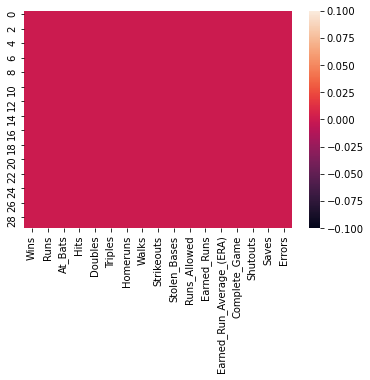

In [54]:
sns.heatmap(df.isna())

* A clean slate, Viola!
* There are no missing values in the dataset.


In [55]:
# Let's check the correlation between the features in the datset.
df.corr()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At_Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Homeruns,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Walks,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strikeouts,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen_Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


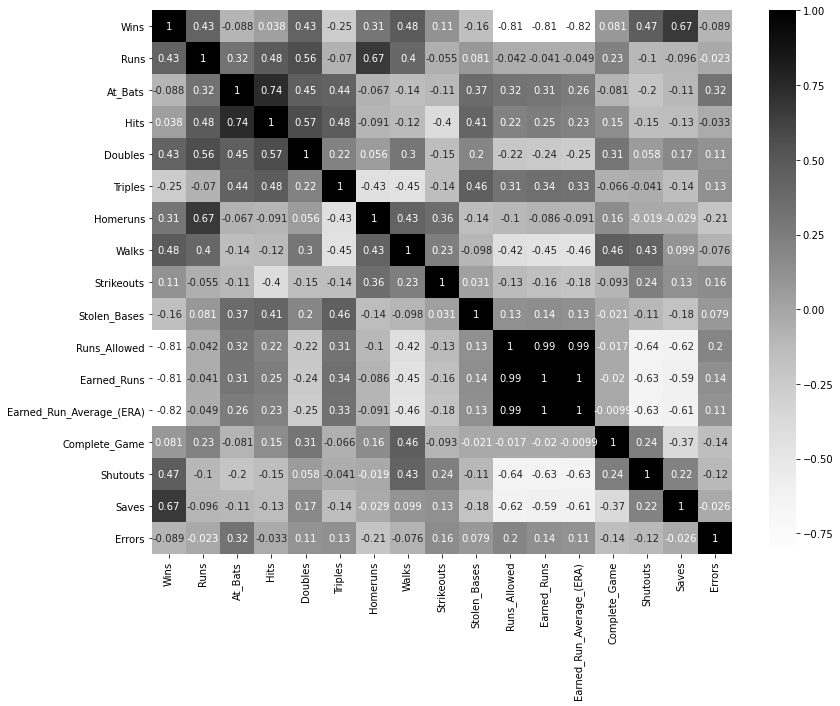

In [56]:
# plot the correaltion
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='Greys')

* Note that there are three highly correlated features.
* They are as follows:
    1. Runs Allowed
    2. Earned Runs 
    3. Earned_Runes_Average_(AVG)

In [57]:
df.corr()['Earned_Runs']

Wins                       -0.809435
Runs                       -0.041245
At_Bats                     0.309686
Hits                        0.252489
Doubles                    -0.235531
Triples                     0.340225
Homeruns                   -0.085922
Walks                      -0.452663
Strikeouts                 -0.161612
Stolen_Bases                0.143068
Runs_Allowed                0.991018
Earned_Runs                 1.000000
Earned_Run_Average_(ERA)    0.997248
Complete_Game              -0.020221
Shutouts                   -0.630192
Saves                      -0.589663
Errors                      0.136921
Name: Earned_Runs, dtype: float64

In [58]:
df

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


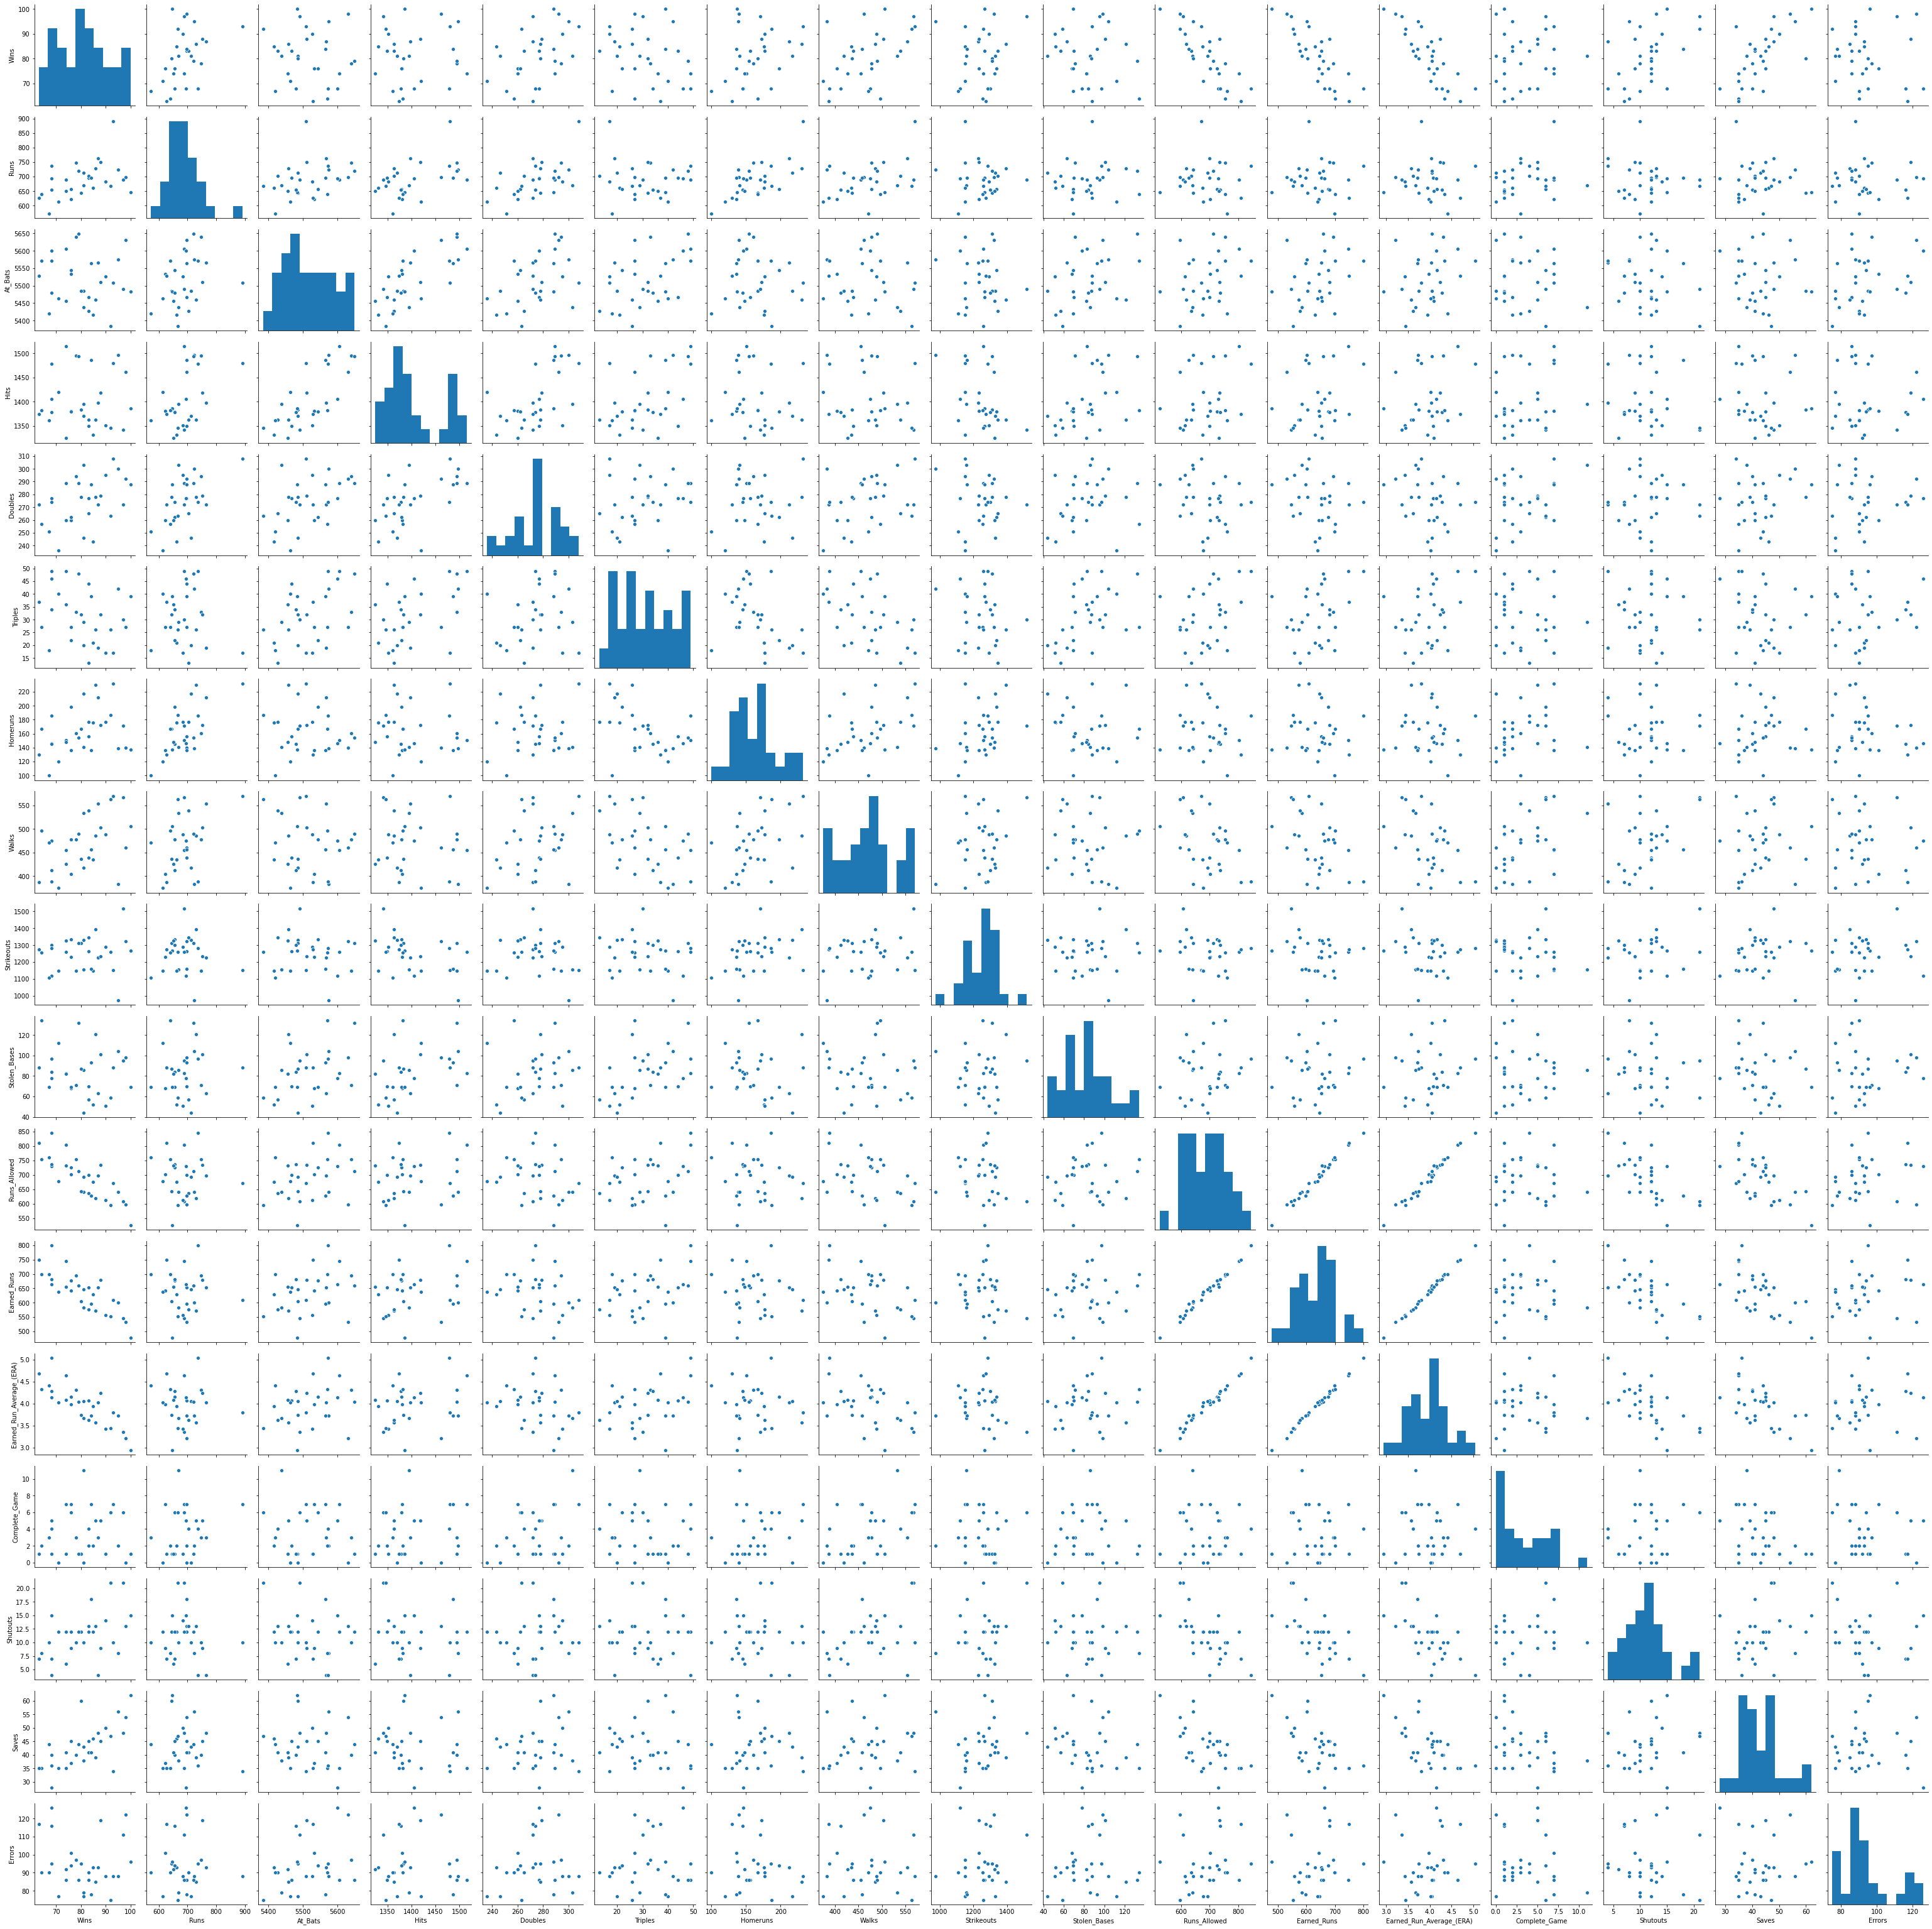

In [60]:
# get the pairplot of the features:
sns.pairplot(df,)

#### `Note:`
#### We have very less number of samples and there are to many number of features in the data.
#### This causes overfitting as the model is prone to have very high variance.
#### Either add more data or remove some features to adress overfitting in the data
#### In this project we cannot add more data, so maybe we will try to reduce some of the features to address the variance of the model.

In [65]:
# Let's address the outliers in the dataset

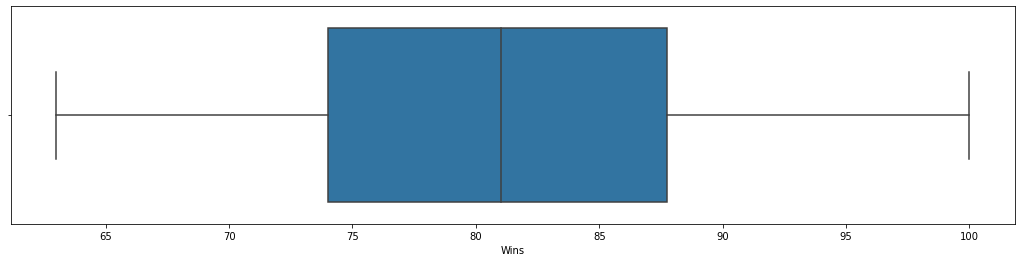

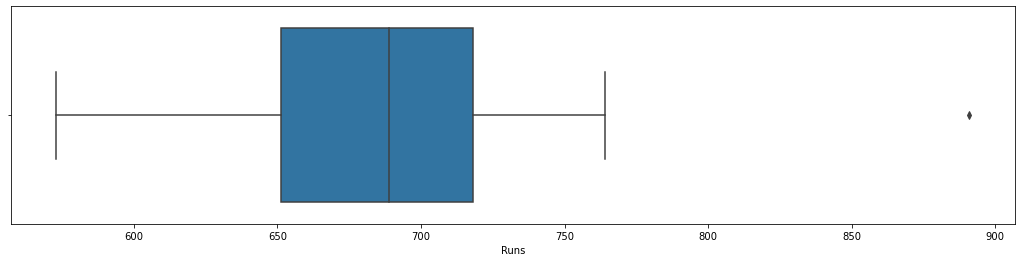

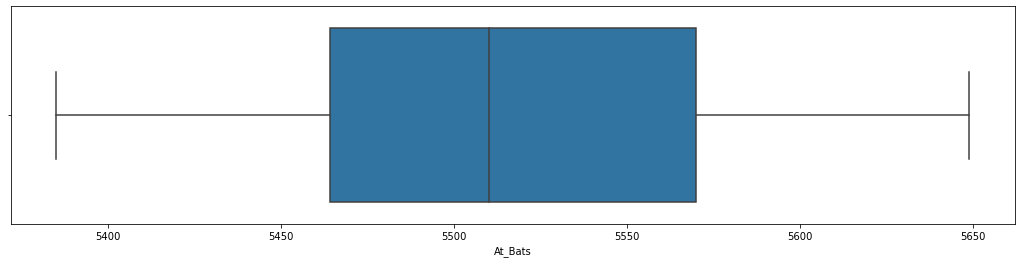

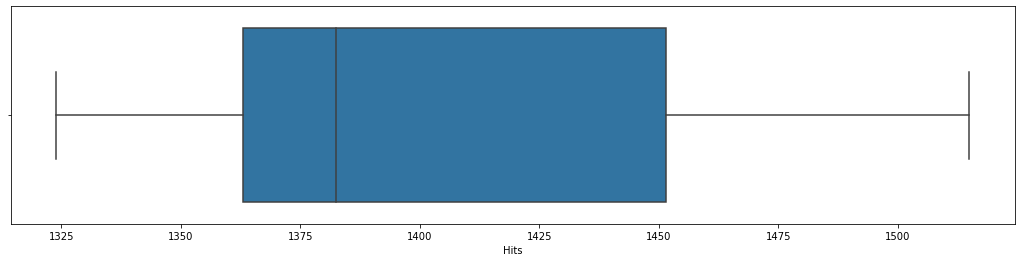

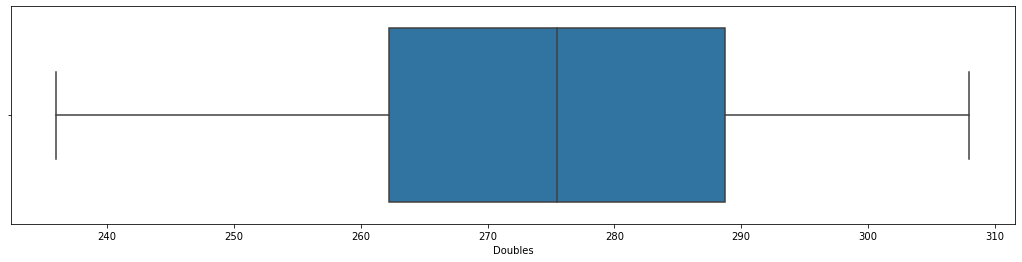

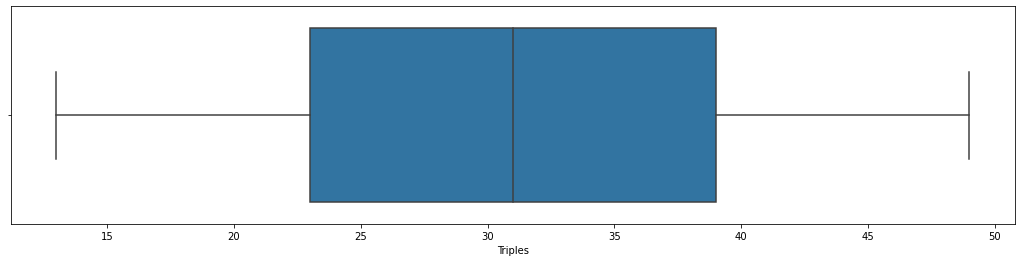

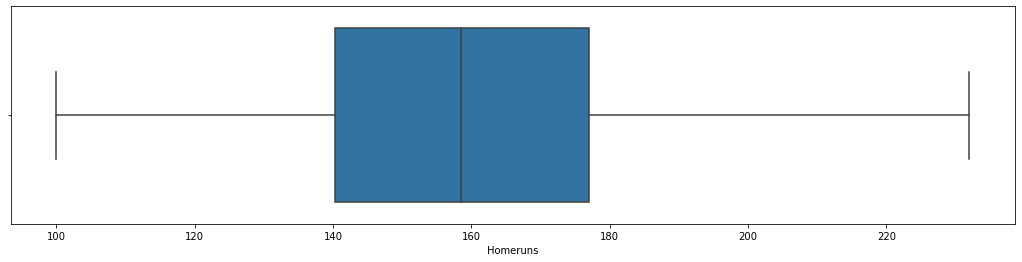

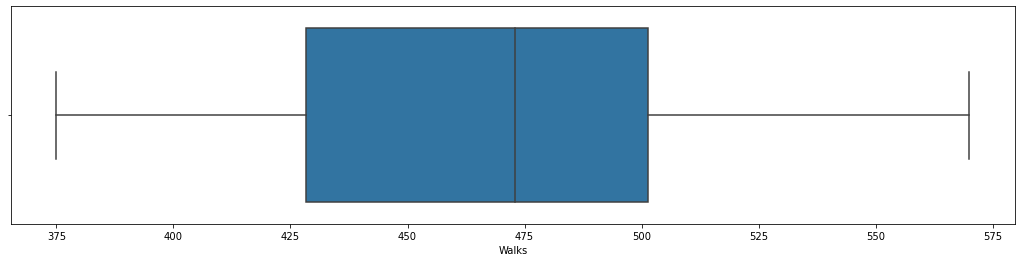

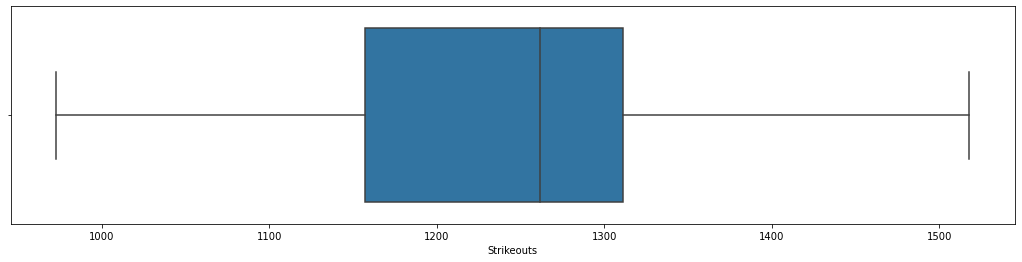

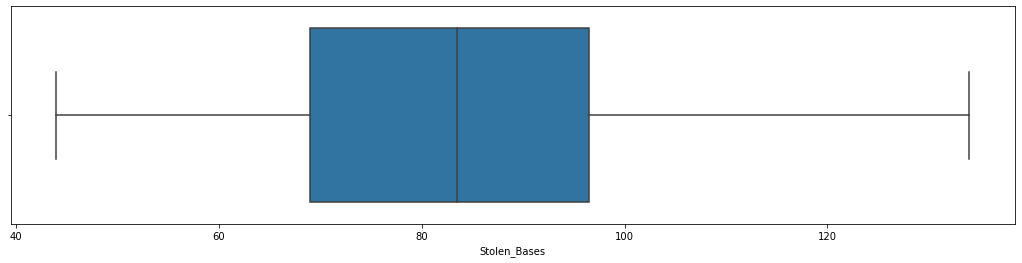

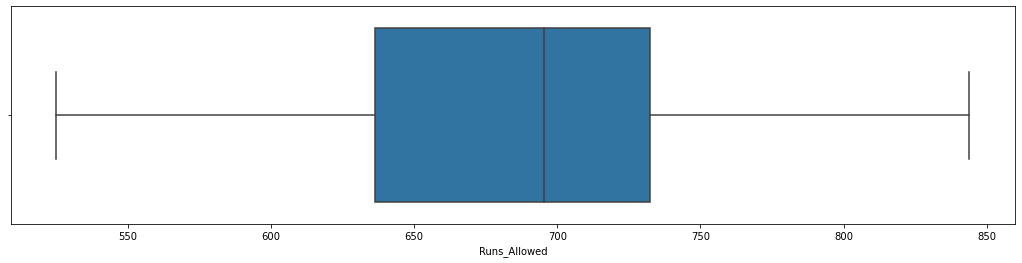

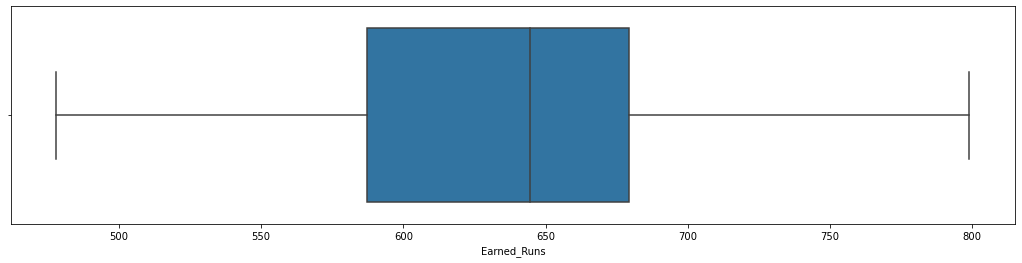

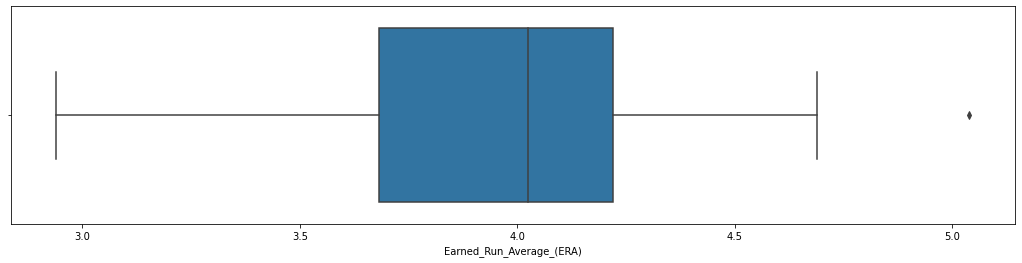

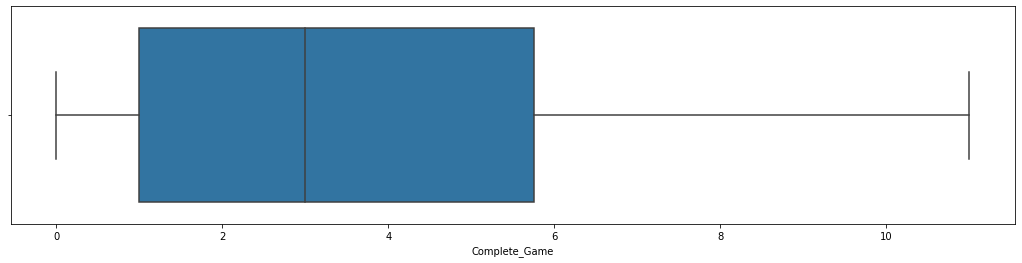

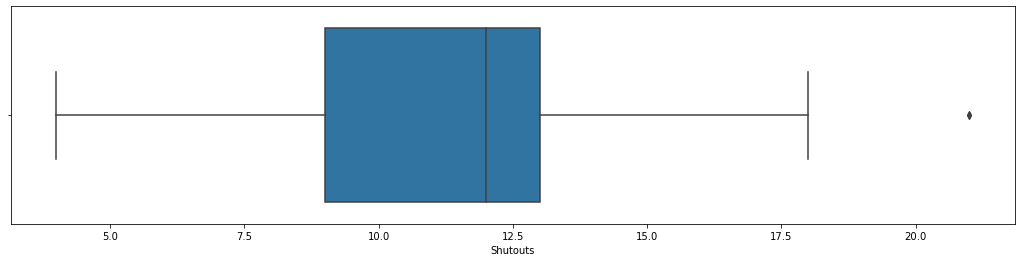

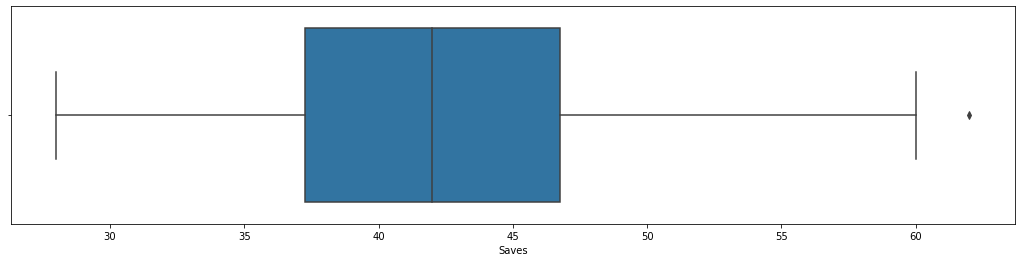

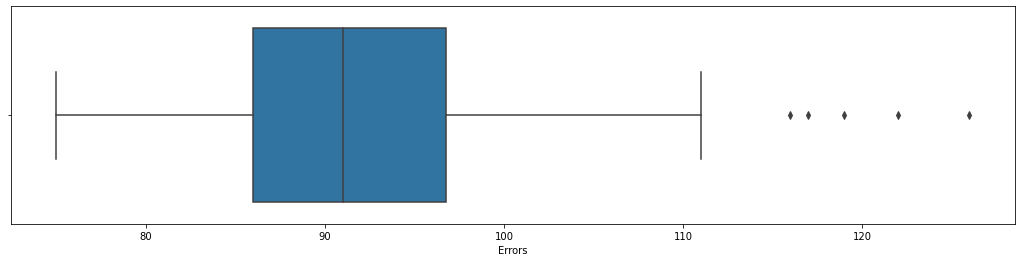

In [69]:
# plotting a box plt for each of the feature seperately:
for col in df:
    plt.figure(figsize=(18,4))
    sns.boxplot(df[col])
    plt.show()

* Some of the features have outliers

In [75]:
# addressing outliers using the IOR:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

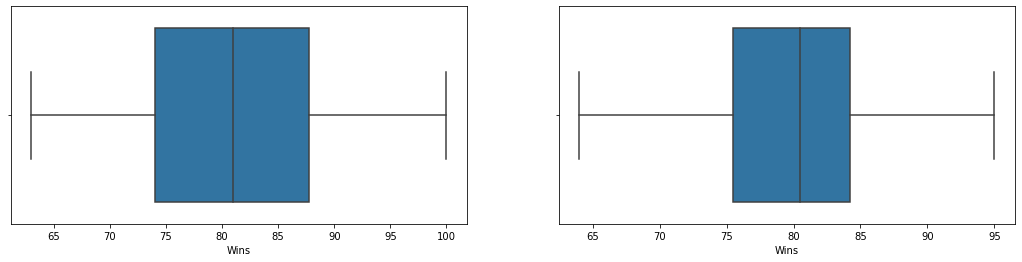

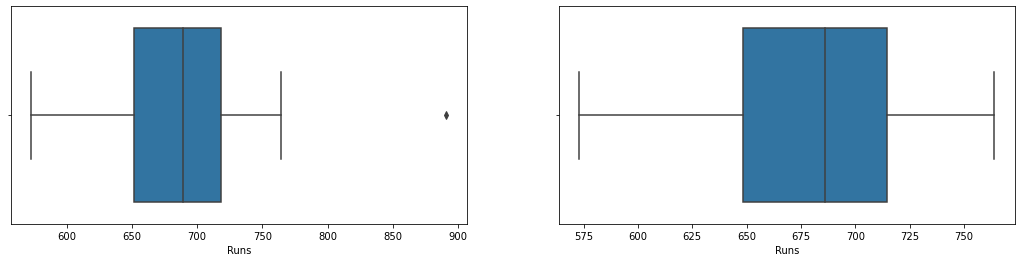

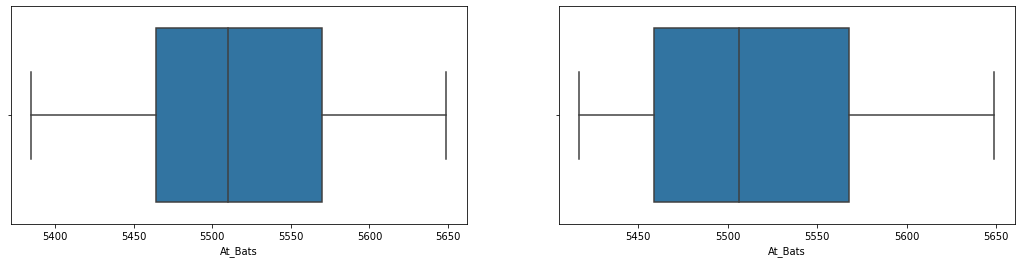

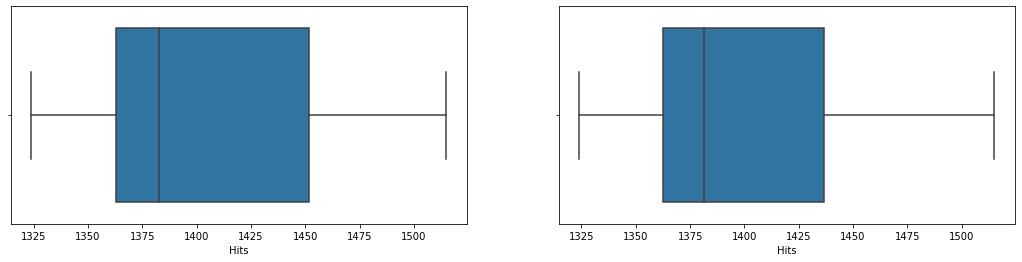

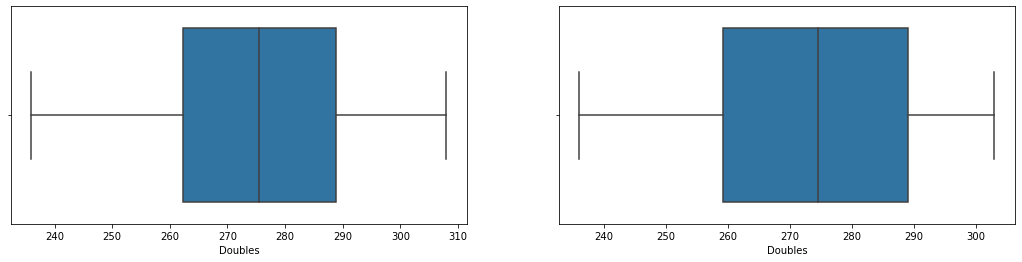

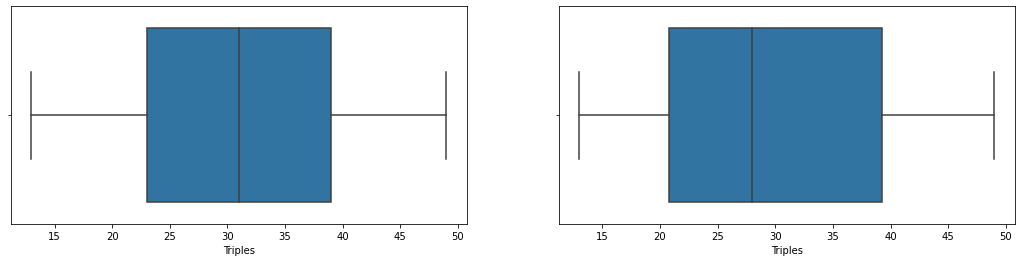

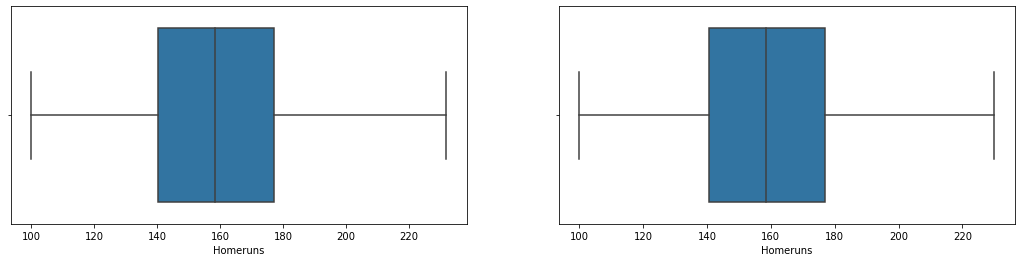

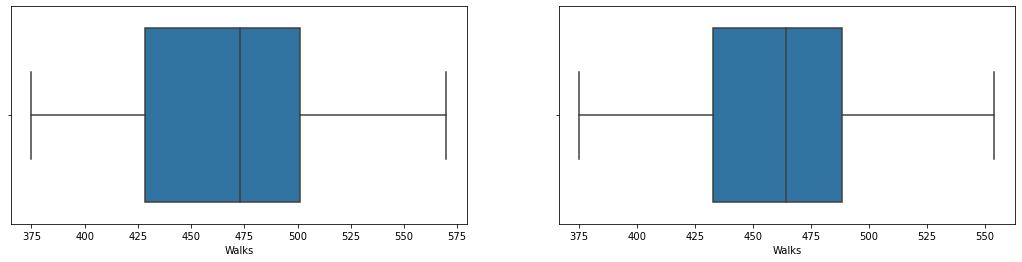

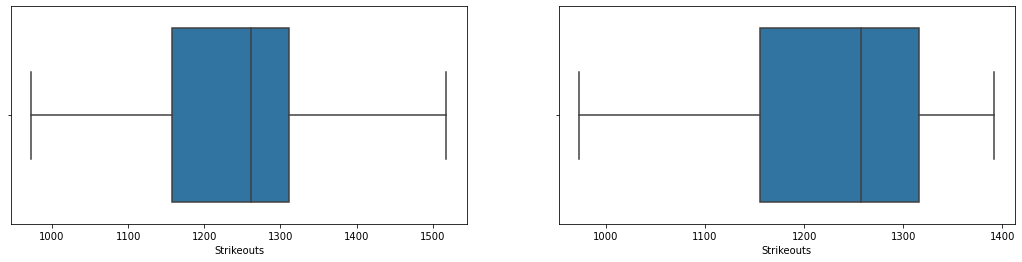

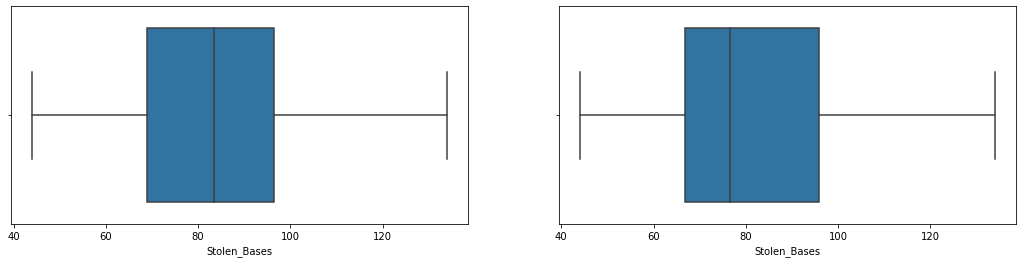

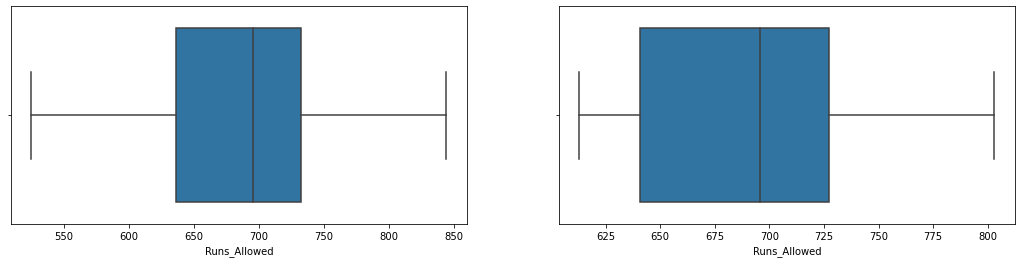

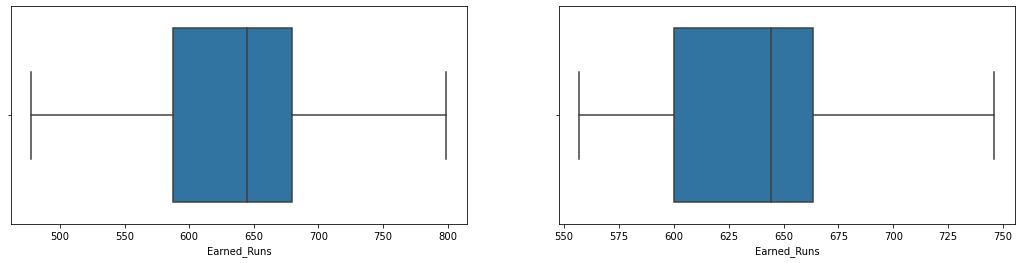

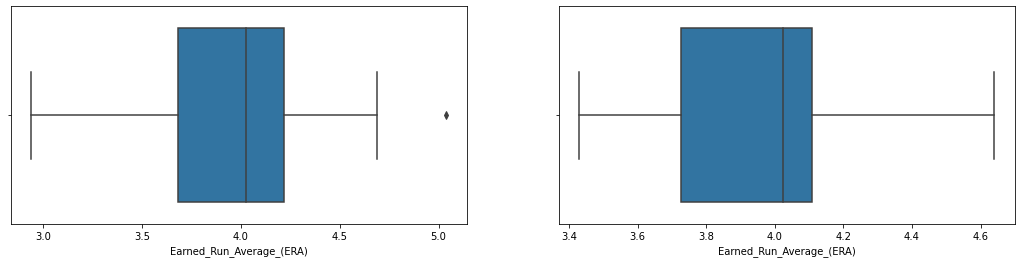

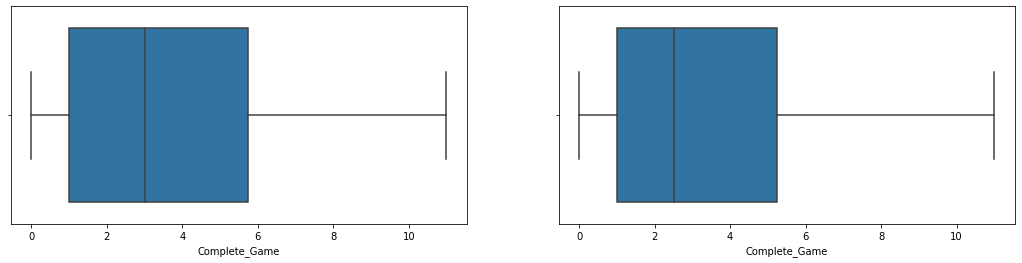

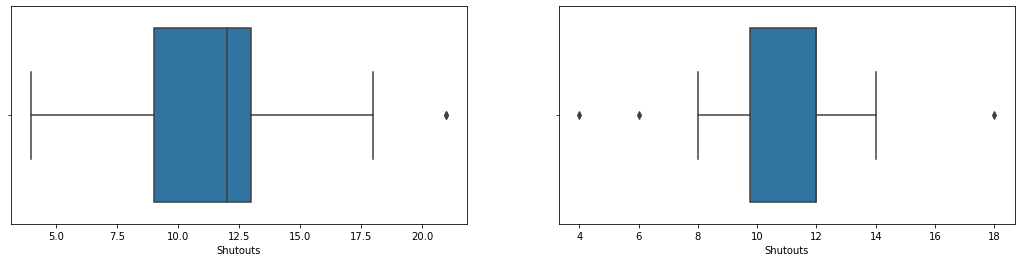

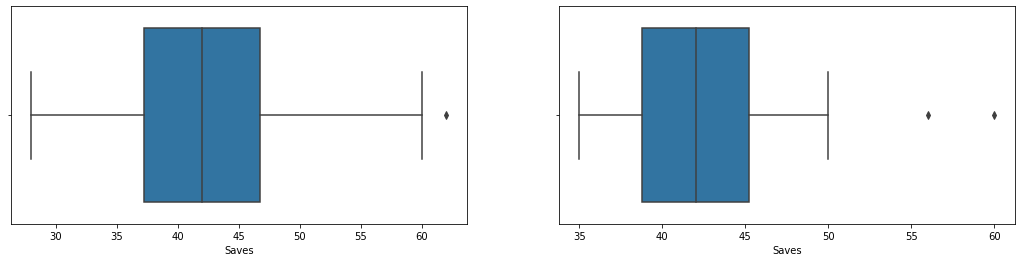

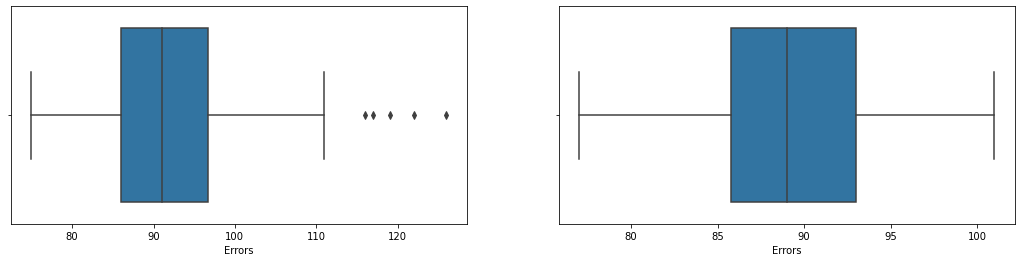

In [79]:
for col in df:
    fig = plt.figure(figsize=(18,4))
    
    fig.add_subplot(121)
    sns.boxplot(df[col])
    
    fig.add_subplot(122)
    sns.boxplot(df_cleaned[col])
    plt.show()

In [81]:
len(df),len(df_cleaned)

(30, 20)

* When we are removing outliers from the data we are ending up removing 1/3 i.e. 0.333 percent of the data.
* This is not acceptable, so lets just keep the outliers in the dataset.
* i.e., Let's just stick with our ouriginal dataset with outliers

In [87]:
# let's check the skewness of the features in the dataset:
df.skew()

Wins                        0.047089
Runs                        1.200786
At_Bats                     0.183437
Hits                        0.670254
Doubles                    -0.230650
Triples                     0.129502
Homeruns                    0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen_Bases                0.479893
Runs_Allowed                0.045734
Earned_Runs                 0.058710
Earned_Run_Average_(ERA)    0.053331
Complete_Game               0.736845
Shutouts                    0.565790
Saves                       0.657524
Errors                      0.890132
dtype: float64

* The standard skew limit is : -1 < Valid < -1.

In [88]:
# we can see that the runs feature has an invalid skew.
# We can address is using the some transformation on the feature
# Let's try log transformation
np.log(df+1).skew()

Wins                       -0.165050
Runs                        0.744813
At_Bats                     0.161062
Hits                        0.628584
Doubles                    -0.375085
Triples                    -0.418009
Homeruns                   -0.009528
Walks                      -0.051289
Strikeouts                 -0.540637
Stolen_Bases               -0.160463
Runs_Allowed               -0.241950
Earned_Runs                -0.278793
Earned_Run_Average_(ERA)   -0.243088
Complete_Game              -0.325962
Shutouts                   -0.589640
Saves                       0.163057
Errors                      0.632916
dtype: float64

* Using the log(n+1) transformation the Complete_Game columns become NaN.
* Thus we did log(n+1) transformation and it is giving us much acceptable results.

In [171]:
# therfore;
df_cleaned = np.log(df + 1)

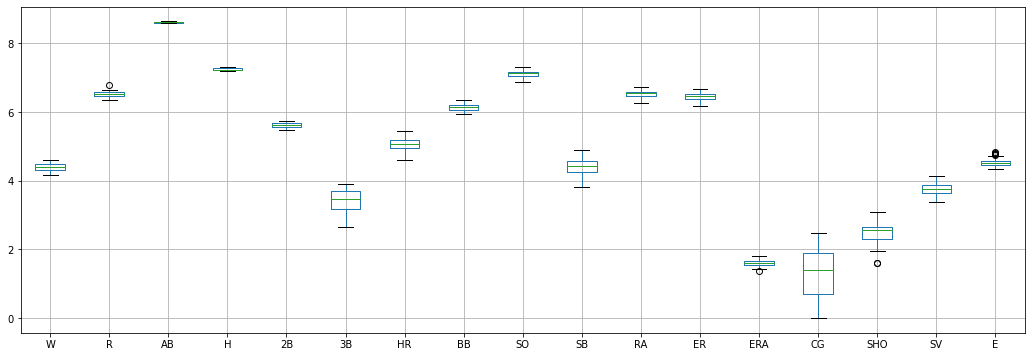

In [96]:
# let's do a complete dataset box plot with the transformed data.
plt.figure(figsize=(18,6))
df_cleaned.boxplot()

In [100]:
# original df
df

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


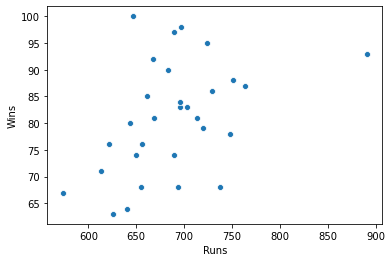

In [143]:
# Wins vs runs
sns.scatterplot(df.Runs,df.Wins)

In [144]:
feature_dict['Runs']

'In baseball, a run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured. A player may score by hitting a home run or by any combination of plays that puts him safely "on base" (that is, on first, second, or third) as a runner and subsequently brings him home.'

* We can say there is some linearity between Runs features and the target ..but noting significant.

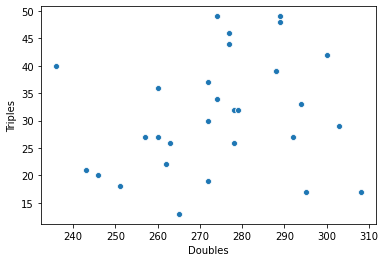

In [103]:
sns.scatterplot(df.Doubles,df.Triples)

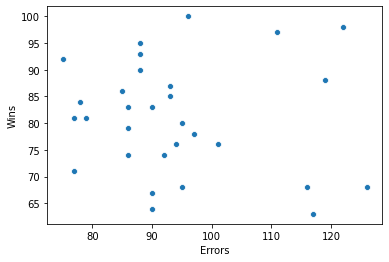

In [140]:
# wins vs erros
sns.scatterplot(df.Errors,df.Wins)

In [142]:
feature_dict['Errors']

'In baseball statistics, an error is an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term  error is sometimes used to refer to the play during which an error was committed.'

In [145]:
df

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


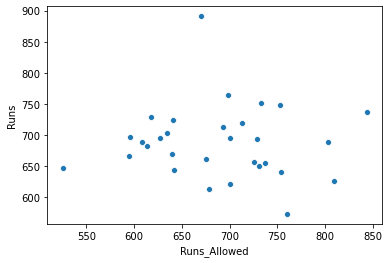

In [165]:
# runs alllowed vs runs scores
sns.scatterplot(df.Runs_Allowed,df.Runs)

In [167]:
# Let's create a Model using the features:

In [423]:
# we will use the log +1 transformed processed dataframe formodel building.
df_cleaned

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908
5,4.543295,6.793466,8.614320,7.300473,5.733341,2.890372,5.451038,6.347389,7.049255,4.488636,6.508769,6.413459,1.568616,2.079442,2.397895,3.555348,4.488636
6,4.477337,6.639876,8.624791,7.242798,5.609472,2.995732,5.361292,6.318968,7.113142,4.158883,6.549651,6.481577,1.615420,1.386294,1.609438,3.891820,4.543295
7,4.406719,6.570883,8.609955,7.223296,5.509388,3.044522,5.384495,6.037871,7.194437,3.806662,6.542472,6.472346,1.619388,0.000000,2.397895,3.784190,4.356709
8,4.394449,6.469250,8.609955,7.232733,5.631212,3.496508,5.123964,6.079933,7.178545,4.477337,6.466145,6.405228,1.556037,0.693147,2.564949,4.110874,4.564348
9,4.369448,6.618739,8.637817,7.310550,5.686975,3.526361,5.087596,6.171701,7.046647,4.276666,6.625392,6.543912,1.669592,1.386294,2.397895,3.713572,4.584967


In [425]:
# let's drop the near perfectly correlated feaatures
df_cleaned.drop(['Runs_Allowed','Earned_Runs'],1,inplace=True)

In [426]:
# Split the features and the target variables into X and y respectively.
X = df_cleaned.drop('Wins',1)
y = df_cleaned['Wins']

In [427]:
# check the shapes
X.shape,y.shape

((30, 14), (30,))

In [428]:
# train _test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)

In [429]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23, 14), (23,), (7, 14), (7,))

In [430]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [431]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [432]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [433]:
# let's create a helper function to give us the r2 score and mse score in return

In [434]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))    

In [435]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 0.002243332452818992
R2_Score 0.8693332554372684


In [436]:
# try2: Ridge Regression
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 0.002244541318883304
R2_Score 0.8692628429609377


In [437]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 0.0022606984729817642
R2_Score 0.8683217418215183


In [438]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 0.0022694205406136466
R2_Score 0.8678137100396566


In [439]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear',C=10,gamma=0.001))

MSE: 0.005901364125097321
R2_Score 0.6562649295530079


In [440]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.008355676034297514
R2_Score 0.5133093248615406


In [441]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=500))

MSE: 0.006836594779545925
R2_Score 0.6017908167756039


In [442]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.00541826962339165
R2_Score 0.6844035969960399


In [443]:
# try3: Adaboost
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

MSE: 0.0030111239002229657
R2_Score 0.8246119263229341


In [444]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(kernel='linear'),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR(kernel='linear')
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [445]:
models_df

,Model,MSE,R2,meanCV
0,Linear,0.002243,0.869333,0.497937
1,Ridge,0.002245,0.869263,0.560001
2,Lasso,0.002373,0.861766,0.611066
3,ElasticNet,0.002269,0.867814,0.589938
4,SVR,0.005901,0.656265,-0.234918
5,Descision_Tree,0.005230,0.695350,-2.439793
6,Random_Forest,0.006665,0.611760,-0.767326
7,Gradient_Boost,0.005016,0.707840,-1.128388
8,Ada_Boost,0.003076,0.820809,0.495814


* The Lasso model is outperforming Linear by around 1 percent
* We can see that the Ensemble Methods are doing bad on this model as one of the main reason for that is `Very Less Data` and `Too Many Features wrt to the number of samples`

In [446]:
# Best model

best_model = Lasso(alpha=0.001)
best_model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [447]:
train_n_ret_scores(Lasso(alpha=0.0001,))

MSE: 0.002285657985901033
R2_Score 0.8668679322022914


In [451]:
np.mean(cross_val_score(best_model,X,y))

0.5791466844384745

* We are getting around 60 percent of accracy on cross_validation with 'r2' metric

In [452]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'BaseBall.pkl')

['BaseBall.pkl']